Moving Average Models
Moving average (MA) is a process where the present value of a time series, y, is defined as a linear combination of past errors. The error term (noise) is represented as e. Both the t-1 and t-2 are lags of the time on the errors.

MA(1) model: $y_{t}$ = $m_{1}$$e_{t-1}$ + $e_{t}$

MA(2) model: $y_{t}$ = $m_{1}$$e_{t-1}$ + $m_{2}$$e_{t-2}$ + $e_{t}$

We typically represent the order of the model as q for a MA model such as MA(q).

Recall that the moving average model was described as a regression between a time series and its lagged error term.  By specifying an order, we set the number of lags.

In [0]:
from pandas import read_csv
from matplotlib import pyplot

###  Example 1: Vacation dataset

In [4]:
vacation = read_csv('df_vacation.csv', index_col=0, parse_dates=True)
vacation.head()

,Num_Search_Vacation
Month,
2004-01-01,94
2004-02-01,89
2004-03-01,86
2004-04-01,79
2004-05-01,89


In [5]:
# Estimate Moving Average

# Import the ARMA module from statsmodels
from statsmodels.tsa.arima_model import ARMA

# Fit an MA(1) model to the first simulated data
mod = ARMA(vacation, order=(0,1))  # order is reversed for MA compared to AR, MA(1)
res = mod.fit()

# Print out summary information on the fit
print(res.summary())

# Print out the estimate for the coefficients
print(res.params)

# S.D. of innovations is standard deviation of errors
# L1 is lag1
# fitted model parameters, MA lag 1

                               ARMA Model Results                              
Dep. Variable:     Num_Search_Vacation   No. Observations:                  190
Model:                      ARMA(0, 1)   Log Likelihood                -717.636
Method:                        css-mle   S.D. of innovations             10.548
Date:                 Fri, 17 Apr 2020   AIC                           1441.271
Time:                         11:39:02   BIC                           1451.012
Sample:                     01-01-2004   HQIC                          1445.217
                          - 10-01-2019                                         
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                        60.2595      1.333     45.212      0.000      57.647      62.872
ma.L1.Num_Search_Vacation     0.7456      0.034     22.077      0.000       0.

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


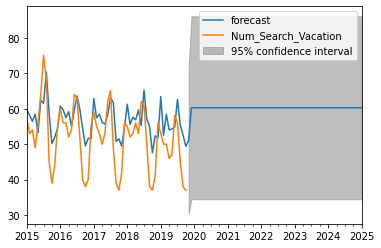

In [6]:
# Forecast Moving Average Model 

# Import the ARMA module from statsmodels
from statsmodels.tsa.arima_model import ARMA

# Forecast the first MA(1) model
mod = ARMA(vacation, order=(0,1))
res = mod.fit()

# Start the forecast 10 data points before the end of the  point series at , 
#and end the forecast 10 data points after the end of the series at point 
res.plot_predict(start='2015', end='2025')
pyplot.show()

###  Example 2: Furniture dataset

In [0]:
furn = read_csv('~/Desktop/section_3/df_furniture.csv', header=0, index_col=0)
furn.head()

,furniture_price_adjusted
Month,
1/1/92,2073.432724
2/1/92,2114.485812
3/1/92,2260.570891
4/1/92,2255.103236
5/1/92,2331.414618


###  Example 2: Bank of America dataset

In [8]:
# Read in BOA dataset, this is original with resampling 
bac= read_csv('df_bankofamerica.csv', index_col=0, parse_dates=True)
# convert daily data to monthly data
bac= bac.resample(rule='M').last()
bac.head()

,Adj Close Price
Date,
1990-01-31,1.542054
1990-02-28,1.687537
1990-03-31,1.469485
1990-04-30,1.441042
1990-05-31,1.525887


In [9]:
# Estimate Moving Average

# Import the ARMA module from statsmodels
from statsmodels.tsa.arima_model import ARMA

# Fit an MA(1) model to the first simulated data
mod = ARMA(bac, order=(0,1))  # order is reversed for MA compared to AR, MA(1)
res = mod.fit()

# Print out summary information on the fit
print(res.summary())

# Print out the estimate for the coefficients
print(res.params)

# S.D. of innovations is standard deviation of errors
# L1 is lag1
# fitted model parameters, MA lag 1

                              ARMA Model Results                              
Dep. Variable:        Adj Close Price   No. Observations:                  358
Model:                     ARMA(0, 1)   Log Likelihood               -1154.281
Method:                       css-mle   S.D. of innovations              6.068
Date:                Fri, 17 Apr 2020   AIC                           2314.562
Time:                        11:40:43   BIC                           2326.203
Sample:                    01-31-1990   HQIC                          2319.192
                         - 10-31-2019                                         
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    16.3783      0.608     26.926      0.000      15.186      17.571
ma.L1.Adj Close Price     0.8993      0.017     52.719      0.000       0.866       0.933
        

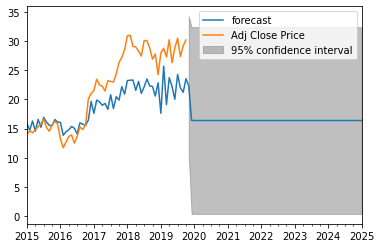

In [10]:
# Forecast Moving Average Model 

# Import the ARMA module from statsmodels
from statsmodels.tsa.arima_model import ARMA

# Forecast the first MA(1) model
mod = ARMA(bac, order=(0,1))
res = mod.fit()

# Start the forecast 10 data points before the end of the  point series at , 
#and end the forecast 10 data points after the end of the series at point 
res.plot_predict(start='2015', end='2025')
pyplot.show()